# SEABORN tutorial vi tips datset

- Seaborn = Easy, beautiful plots.
- Matplotlib = Full control & customization.
- We use both together to get the best of both worlds.

columns and their meaning:

- total_bill: Total bill (in USD) for the meal, including food and drinks
- tip: Tip amount given by the customer
- sex: Gender of the person paying the bill — "Male" or "Female"
- smoker: Whether the customer is a smoker — "Yes" or "No"
- day: Day of the week — "Thur", "Fri", "Sat", or "Sun"
- time: Time of the meal — "Lunch" or "Dinner"
- size: Number of people at the table (party size)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

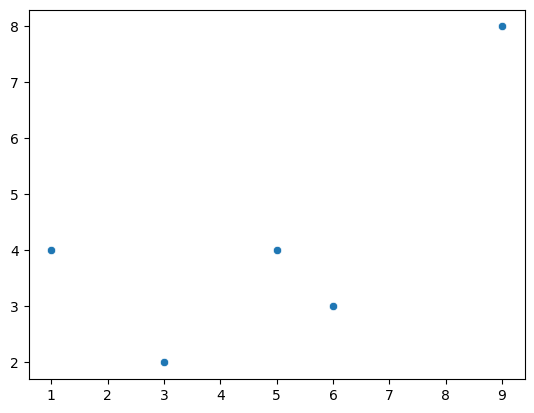

In [3]:
# Basic scatter plot:
x = [1, 3, 5, 6, 9]
y = [4, 2, 4, 3, 8]

sns.scatterplot(x=x, y=y) # Scatter plot using Seaborn
plt.show() # in some environment, this is needed

In [4]:
# seaborn gives us the ability to dowload dataset from the web and experiment with that.
# So lets work on one of the downloaded dataset.

# df = sns.load_dataset("iris")
df = sns.load_dataset("tips")
print(df)

# total_bill: Total bill (in USD) for the meal, including food and drinks
# tip: Tip amount given by the customer
# sex: Gender of the person paying the bill — "Male" or "Female"
# smoker: Whether the customer is a smoker — "Yes" or "No"
# day: Day of the week — "Thur", "Fri", "Sat", or "Sun"
# time: Time of the meal — "Lunch" or "Dinner"
# size: Number of people at the table (party size)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [3]:
# Load built-in dataset
df = sns.load_dataset("tips")
print(df.head(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2


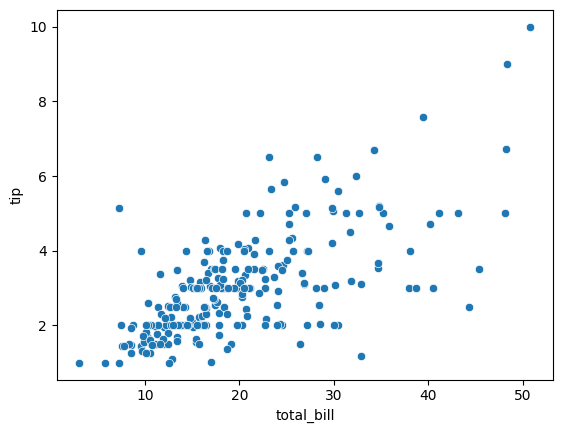

In [5]:
# basic plot
sns.scatterplot(data = df, x = 'total_bill', y = 'tip' )
plt.show()

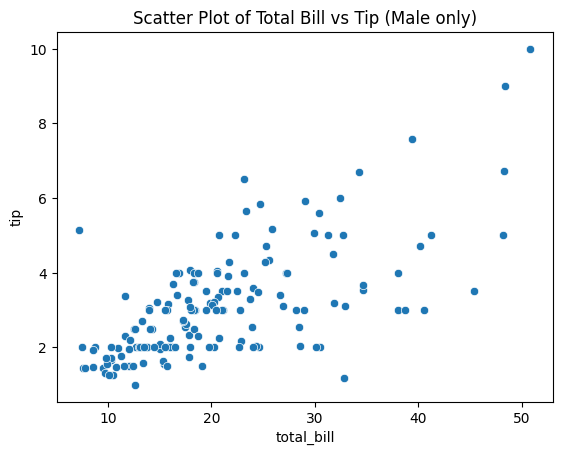

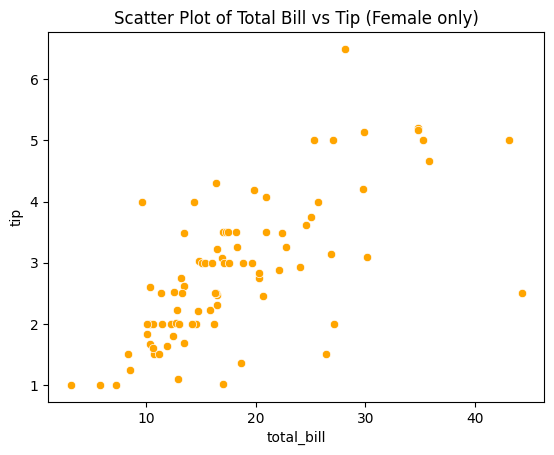

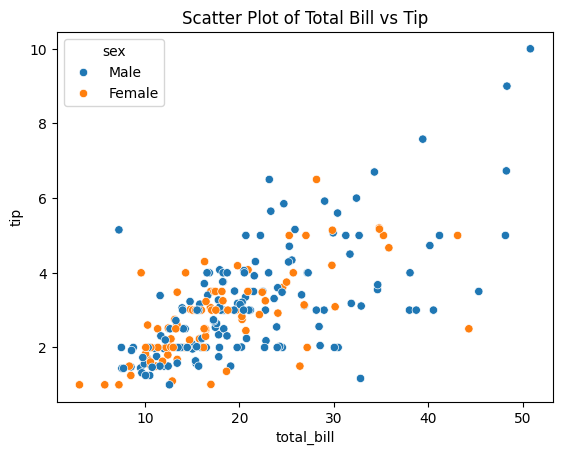

In [15]:
# (SKIP) Basic Scatter Plot

male_df = df[df['sex'] == 'Male']
# Scatter plot for males
sns.scatterplot(data=male_df, x="total_bill", y="tip", )
plt.title("Scatter Plot of Total Bill vs Tip (Male only)")
plt.show()


female_df = df[df['sex'] == 'Female']
# Scatter plot for males
sns.scatterplot(data=female_df, x="total_bill", y="tip", color='#FFA500')
plt.title("Scatter Plot of Total Bill vs Tip (Female only)")
plt.show()


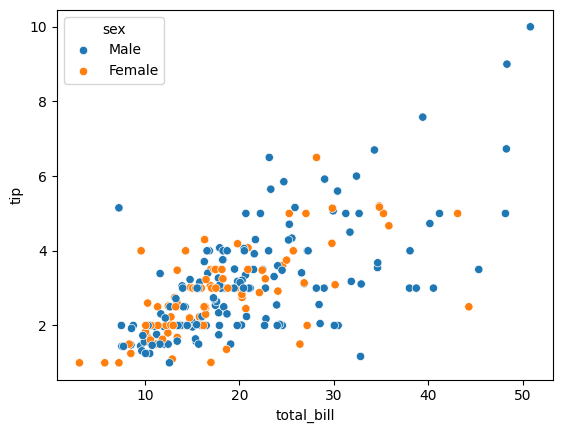

In [7]:
# Now I want to seperate based on sex: male and female
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex' )
plt.show()

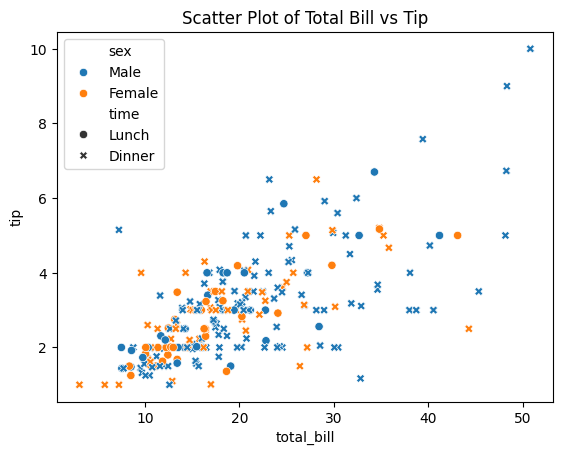

In [8]:
# Now I want to seperate based on sex: male and female and also display the time category
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'sex' , style = 'time' )
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

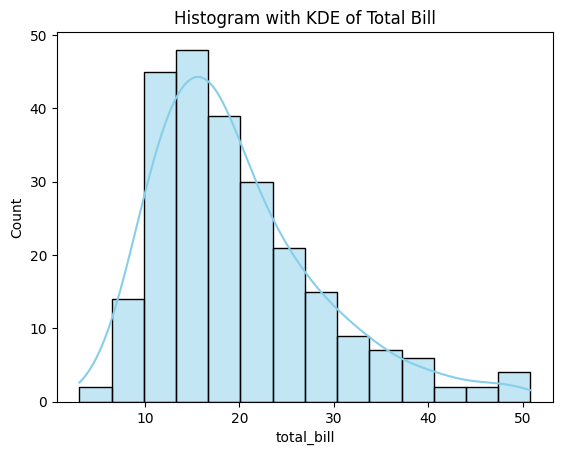

In [9]:
# lets look at distribution total_bill
x = df['total_bill']
# print(x)
sns.histplot(x, kde=True, color="skyblue")
plt.title("Histogram with KDE of Total Bill")
plt.show()

## observation:
* Most people in this dataset spent between $10–$20 on their meal.
* A few people spent a lot more (up to ~$50), which the KDE curve will show as a long tail to the right.

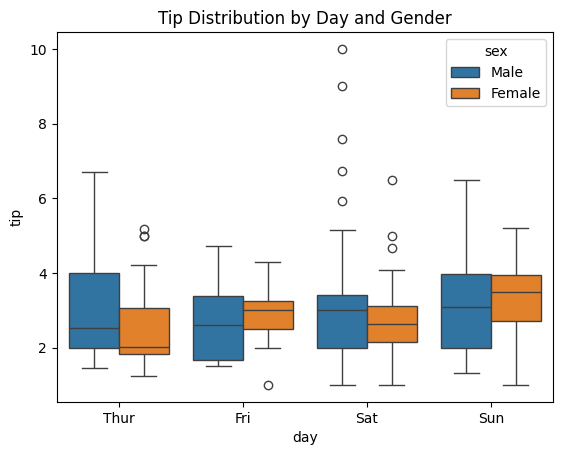

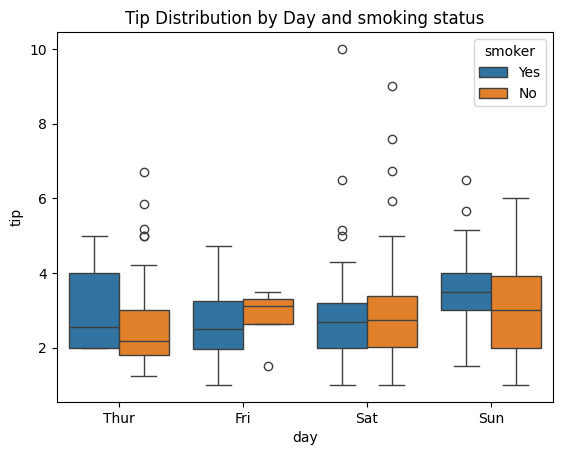

In [19]:
# Boxplot of tips by day
sns.boxplot(data=df, x="day", y="tip", hue="sex")
plt.title("Tip Distribution by Day and Gender")
plt.show()

#################################
sns.boxplot(data=df, x="day", y="tip", hue="smoker")
plt.title("Tip Distribution by Day and smoking status")
plt.show()


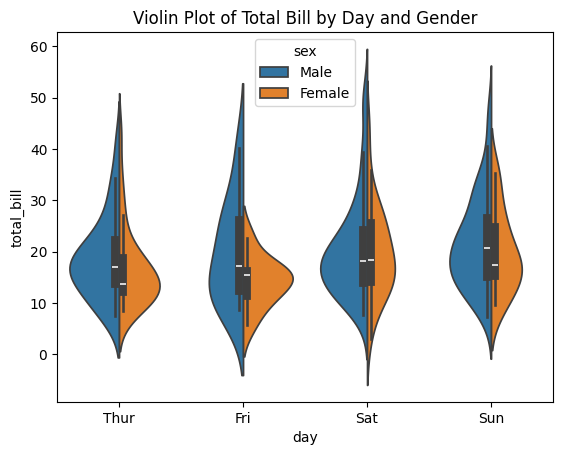

In [18]:
# Violin plot to show distribution and density
sns.violinplot(data=df, x="day", y="total_bill", hue="sex", split=True)
plt.title("Violin Plot of Total Bill by Day and Gender")
plt.show()


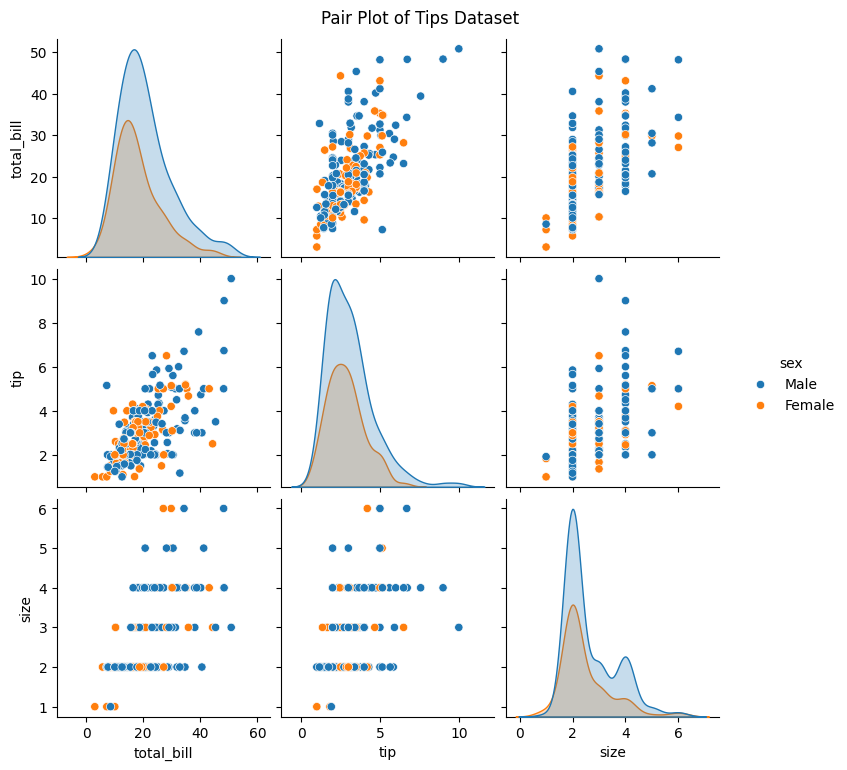

In [7]:
# Pairwise relationships in dataset: Allows to see if there is any relation between data
sns.pairplot(df, hue="sex")
plt.suptitle("Pair Plot of Tips Dataset", y=1.02)
plt.show()


## observation:
### Diagonal Plots: These are histograms (or KDEs) of each individual numeric variable, split by sex.

- total_bill diagonal plot: Shows the distribution of total bills (Males may have a slightly wider range, suggesting they might pay for higher bills more often.)
- tip diagonal plot: Distribution of tip values. (Both sexes give tips in similar ranges, though you spot that male group tends to give slightly more.)
- size diagonal plot: Shows group sizes. (Most group sizes are 2–4, regardless of gender.)

### total_bill vs tip:

- Positive correlation: higher total bill → higher tip (as expected).

### total_bill vs size:
- Generally, larger parties lead to larger bills.
- Points cluster around party size 2–4.
- Sex coloring can reveal if, say, males tend to be in slightly larger groups.


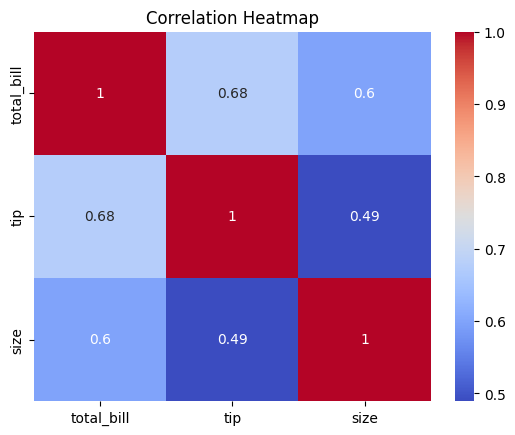

In [10]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


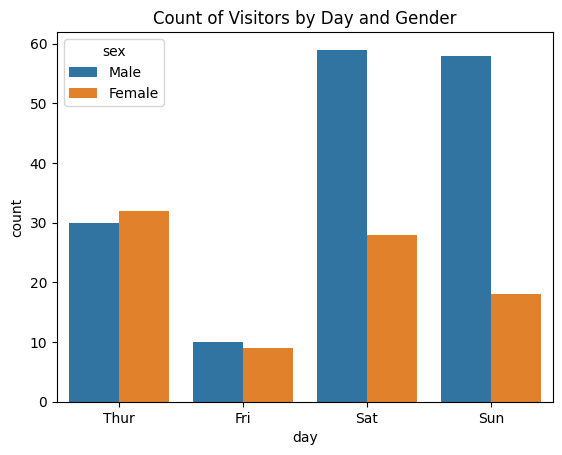

In [11]:
# Count of categorical values
sns.countplot(data=df, x="day", hue="sex")
plt.title("Count of Visitors by Day and Gender")
plt.show()

